In [110]:
import numpy as np
import matplotlib.pyplot as plt

# Questão 1

In [162]:
def bfs(grafo, ponto_inicial, ponto_final):
    fila = [ponto_inicial]
    pais = {}
    visitados = []
    while fila:
        no = fila.pop(0)

        if no == ponto_final:
            break

        for vizinho, _ in grafo.get(no, []):
            if vizinho not in visitados:
                visitados.append(vizinho)
                pais[vizinho] = no
                fila.append(vizinho)

    caminho = [ponto_final]
    while caminho[-1] != ponto_inicial:
        caminho.append(pais[caminho[-1]])
    caminho.reverse()

    return caminho, visitados


In [149]:
grafo = {
    'A': [('B', 3), ('C', 5), ('D', 2), ('H', 10)],
    'B': [('A', 3), ('C', 5), ('D', 8), ('E', 4), ('G', 6), ('H', 6)],
    'C': [('A', 5), ('B', 5), ('E', 1), ('F', 7), ('G', 9)],
    'D': [('A', 2), ('B', 8), ('E', 12), ('H', 14)],
    'E': [('B', 4), ('C', 1), ('D', 12), ('G', 15)],
    'F': [('C', 7), ('H', 9)],
    'G': [('B', 6), ('C', 9), ('H', 3), ('E', 15)],
    'H': [('A', 10), ('B', 6), ('D', 14), ('G', 3), ('F', 9)]
}

heuristicas = {
    'A': 6, 
    'B': 5, 
    'C': 4, 
    'D': 3, 
    'E': 2, 
    'F': 1, 
    'G': 0, 
    'H': 1
}


# Questão 2

In [64]:
def func_objetivo(x, y):
    return x**2 + y**2 + 25*(np.sin(x)**2 + np.sin(y)**2)

In [96]:
def hill_climbing(x0, y0, delta=0.1):
    visitados = [(x0,y0)]
    it = 0
    while True:
        valor_func_atual = func_objetivo(x0,y0)

        possiveis_direcoes = np.array([(x0,y0+delta), (x0,y0-delta), (x0+delta,y0), (x0-delta,y0),
                            (x0+delta,y0+delta), (x0-delta,y0-delta), (x0-delta,y0+delta), (x0+delta,y0-delta)])

        valores_func_vizinhos = np.array([func_objetivo(x,y) for x,y in possiveis_direcoes])

        if valores_func_vizinhos[valores_func_vizinhos < valor_func_atual].size == 0:
            break

        idxmin = np.argmin(valores_func_vizinhos)

        x0,y0 = tuple(float(x) for x in possiveis_direcoes[idxmin])
        visitados.append((x0,y0))
        
        it+=1

    return x0, y0, valor_func_atual, visitados

In [91]:
np.random.uniform(0,10)

3.931973987692363

In [105]:
def hill_climbing_reinicio_aleatorio(n=10):
    menor = float('inf')
    melhor_inicio = {}
    for _ in range(n):
        x = np.random.uniform(0,10)
        y = np.random.uniform(0,10)
        x_final,y_final, minimo_encontrado, visitados =  hill_climbing(x, y)

        if minimo_encontrado < menor:
            menor = minimo_encontrado
            melhor_x = x_final
            melhor_y = y_final
            melhor_visitados = visitados
        
    melhor_inicio[(melhor_x, melhor_y)] = [menor, melhor_visitados]
    
    return melhor_inicio

In [108]:
hill_climbing_reinicio_aleatorio(n=1000)

{(0.0036660286104238937,
  -2.080405960278031e-05): [np.float64(0.0003494436578900673), [(1.203666028610424,
    1.099979195940397),
   (1.1036660286104238, 0.9999791959403971),
   (1.0036660286104238, 0.8999791959403971),
   (0.9036660286104238, 0.7999791959403971),
   (0.8036660286104238, 0.6999791959403971),
   (0.7036660286104238, 0.5999791959403972),
   (0.6036660286104238, 0.4999791959403972),
   (0.5036660286104239, 0.3999791959403972),
   (0.4036660286104239, 0.29997919594039724),
   (0.3036660286104239, 0.19997919594039723),
   (0.2036660286104239, 0.09997919594039723),
   (0.1036660286104239, -2.080405960278031e-05),
   (0.0036660286104238937, -2.080405960278031e-05)]]}

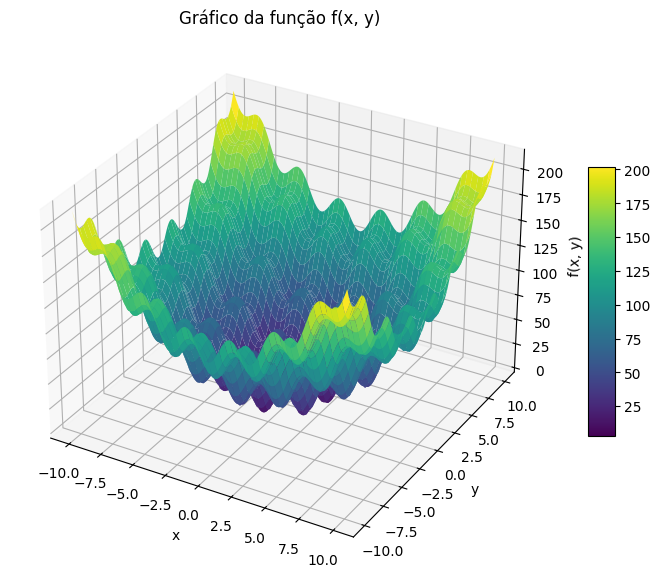

In [101]:
import matplotlib.pyplot as plt

def f(x, y):
    return x**2 + y**2 + 25 * (np.sin(x)**2 + np.sin(y)**2)

x = np.linspace(-10, 10, 300)
y = np.linspace(-10, 10, 300)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')

ax.set_title('Gráfico da função f(x, y)')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')

fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)
plt.show()


## Análise

- A função apresenta múltiplos mínimos locais. Como isso afeta o algoritmo?
    - Com uma grande quantidade de mínimos locais, o algoritmo Hill Climbing acaba parando com mais facilidade nesses mínimos, dificultando a procura pelo mínimo global.
- A versão com reinício melhora a capacidade de encontrar o mínimo global?
    - Sim, para uma grande quantidade de reinícios
- 